In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Bank Marketing dataset
https://archive.ics.uci.edu/dataset/222/bank+marketing

Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

From UCI:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


### About the Data
---


### Input variables:
bank client data:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: 'cellular','telephone') 
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



## Understanding the Data

In [2]:
# data separated with ';' 
df = pd.read_csv(r'Bank_Marketing_dataset\bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

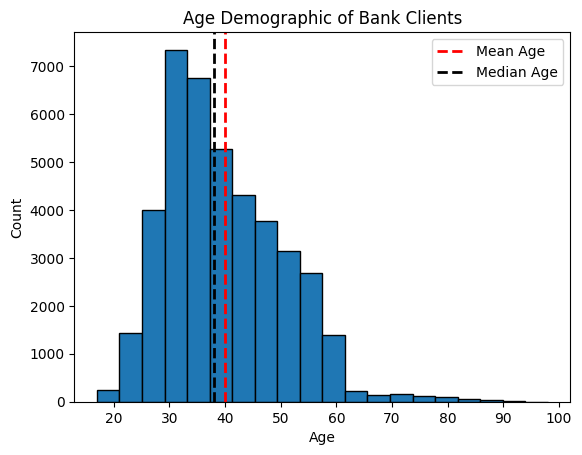

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [4]:
# histogram of age of clients
age_hist = plt.hist(df['age'], bins=20, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Demographic of Bank Clients')
# Calculate mean and median age
mean_age = df['age'].mean()
median_age = df['age'].median()

# Add a vertical line for the mean age
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')

# Add a vertical line for the median age
plt.axvline(median_age, color='black', linestyle='dashed', linewidth=2, label='Median Age')

plt.legend()
plt.show()
df['age'].describe()

The age demographic of those called by the bank are:
- the most common age of the contacts were in their 30's
- the average age, however is 40 years old, indicating that the bank's target market were those in their middle ages

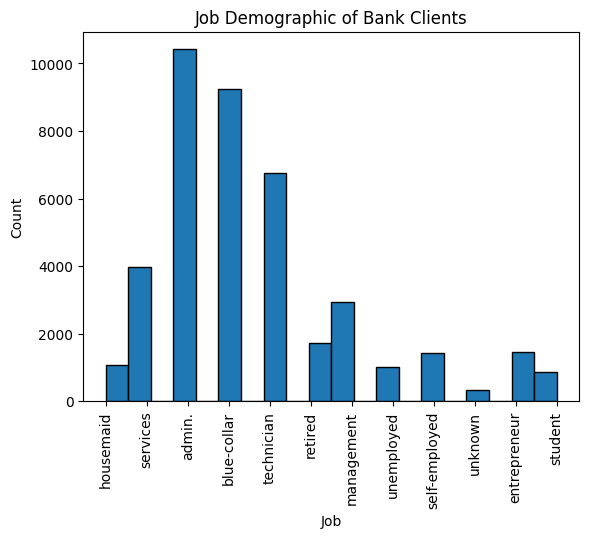

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

In [5]:
job_hist = plt.hist(df['job'], bins=20, edgecolor='black')

plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Demographic of Bank Clients')
plt.xticks(rotation='vertical')
plt.show()

df['job'].describe()

- the most common jobs that the bank tried to target were office workers
- admin, blue-collar, and technician roles were the most prevalent jobs

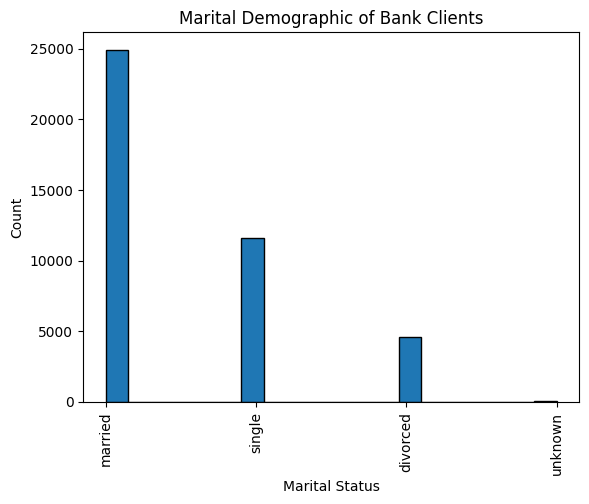

count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

In [6]:
marital_hist = plt.hist(df['marital'], bins=20, edgecolor='black')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Demographic of Bank Clients')
plt.xticks(rotation='vertical')
plt.show()

df['marital'].describe()

- the callers were majority married

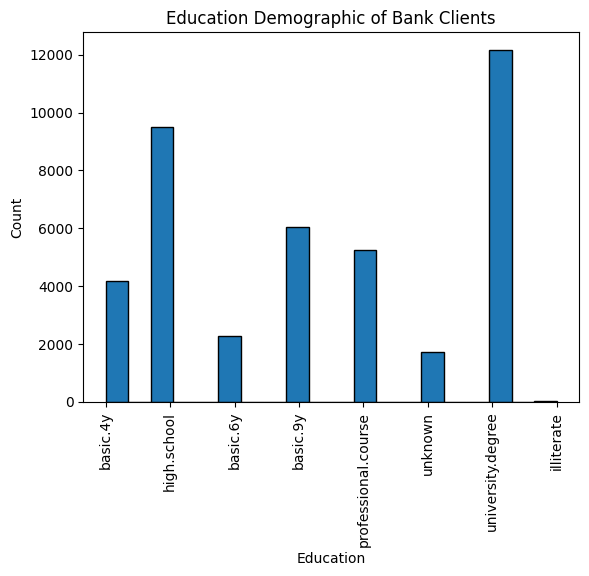

count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

In [7]:
educ_hist = plt.hist(df['education'], bins=20, edgecolor='black')

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Demographic of Bank Clients')
plt.xticks(rotation='vertical')
plt.show()

df['education'].describe()

- majority of the callers have a university degree
- the next most common educational attainment among the callers was high school

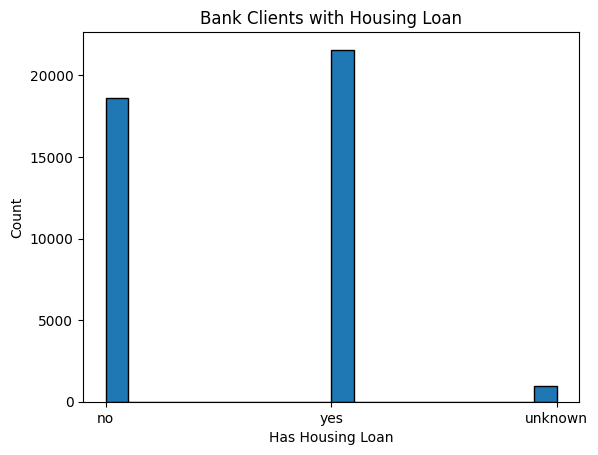

count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object

In [8]:
housing_hist = plt.hist(df['housing'], bins=20, edgecolor='black')
plt.xlabel('Has Housing Loan')
plt.ylabel('Count')
plt.title('Bank Clients with Housing Loan')

plt.show()

df['housing'].describe()

- the demographic of the callers showed that there was a close split between having a housing loan and not having one, with a bit more than half having a housing loan

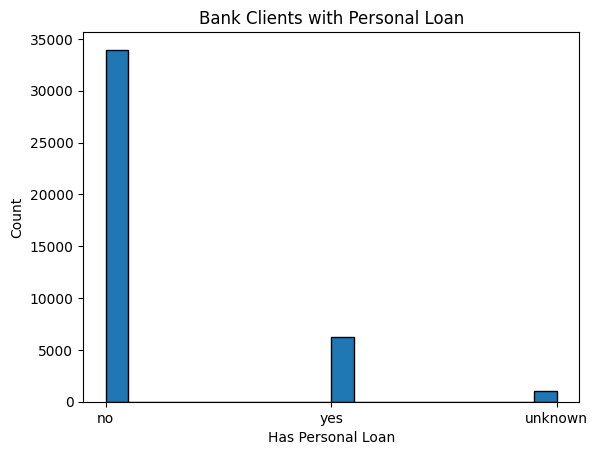

In [9]:
loan_hist = plt.hist(df['loan'], bins=20, edgecolor='black')
plt.xlabel('Has Personal Loan')
plt.ylabel('Count')
plt.title('Bank Clients with Personal Loan')

plt.show()

- an overwhelming majority of the callers did not have a personal loan

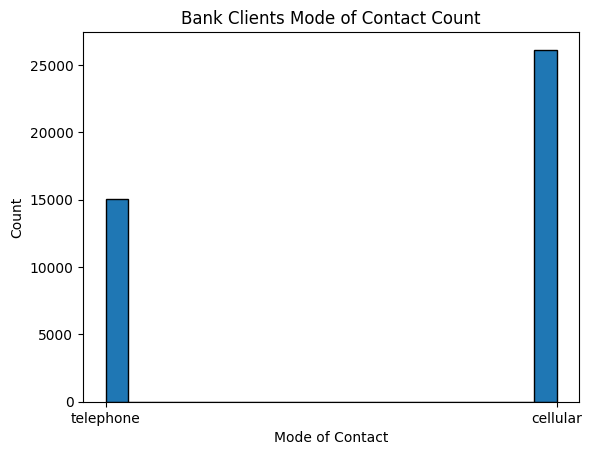

count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object

In [10]:
contact_hist = plt.hist(df['contact'], bins=20, edgecolor='black')
plt.xlabel('Mode of Contact')
plt.ylabel('Count')
plt.title('Bank Clients Mode of Contact Count')

plt.show()
df['contact'].describe()

- most of the callers are contacted on their cellphone, rather than on their telephone

So, from the data, the bank's typical caller would be those who are in their 30's to 40's, works in a office, are married, has finished university, probably has a housing loan, but no personal loan, and is only reachable on their cellphone.

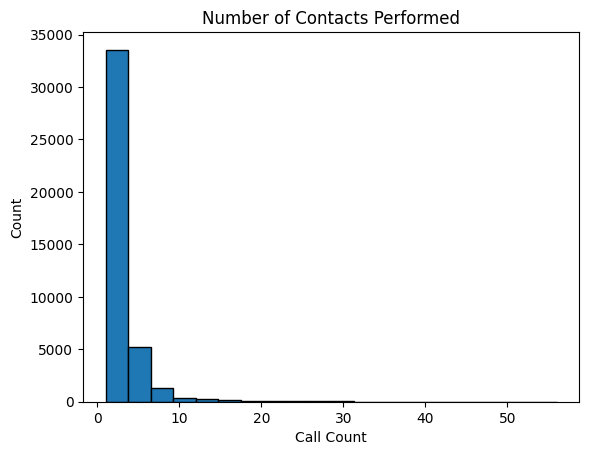

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [11]:
camp_hist = plt.hist(df['campaign'], bins=20, edgecolor='black')

plt.xlabel('Call Count')
plt.ylabel('Count')
plt.title('Number of Contacts Performed')
plt.show()

df['campaign'].describe()

- callers were contacted by the bank for campaign 2 to 3 times on average

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

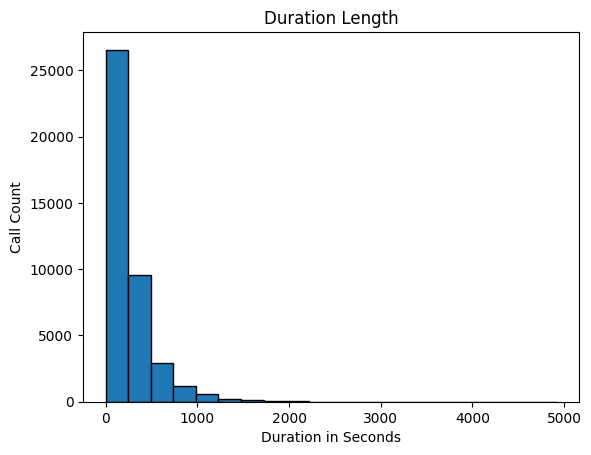

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
median:   180.0
mode:   85, 90


In [13]:
duration_hist = plt.hist(df['duration'], bins=20, edgecolor='black')

plt.xlabel('Duration in Seconds')
plt.ylabel('Call Count')
plt.title('Duration Length')
plt.show()

print(df['duration'].describe())

#call length averages
print('median:  ',df['duration'].median())
mode_duration = df['duration'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')

- The mean average call duration is around 4.3 mins long
- The median duration of calls was at 3 mins long
- Interestingly, the most common call durations were around 1.4 mins to 1.5 mins

- So, this may indicate that if the bank can get a potential caller to keep the call going for past 1.5 mins, they may increase their subscription success. However, they would have a limit of 3 to 4 mins to be able to market their term deposit well.

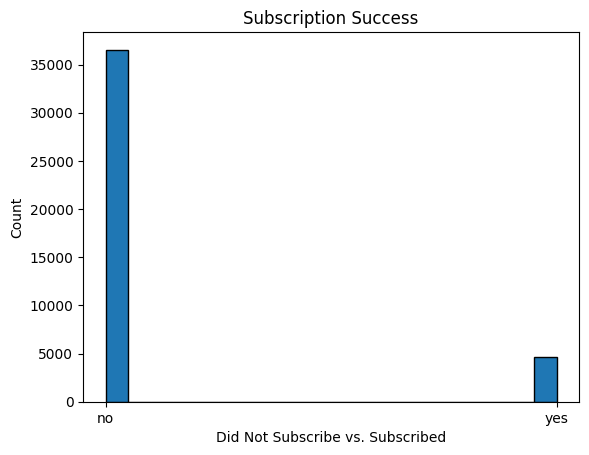

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

In [14]:
sub_hist = plt.hist(df['y'], bins=20, edgecolor='black')

plt.xlabel('Did Not Subscribe vs. Subscribed')
plt.ylabel('Count')
plt.title('Subscription Success')
plt.show()
df['y'].describe()

- The actual result of the campaign was that most of all contacted by the bank did not actually subscribe to a term deposit.

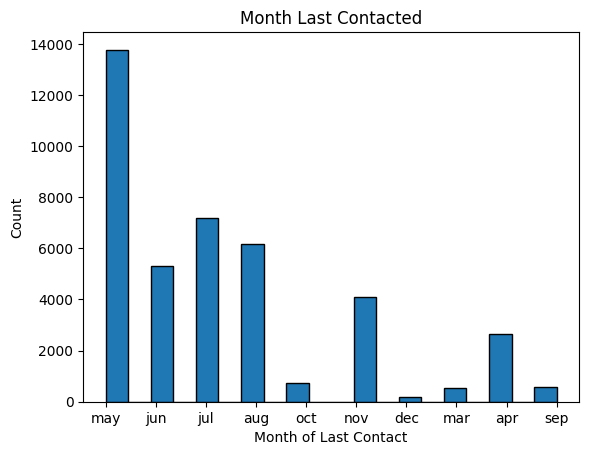

count     41188
unique       10
top         may
freq      13769
Name: month, dtype: object

In [15]:
month_hist = plt.hist(df['month'], bins=20, edgecolor='black')

plt.xlabel('Month of Last Contact')
plt.ylabel('Count')
plt.title('Month Last Contacted')
plt.show()
df['month'].describe()

* the bank contacted the most potential clients during the month of may

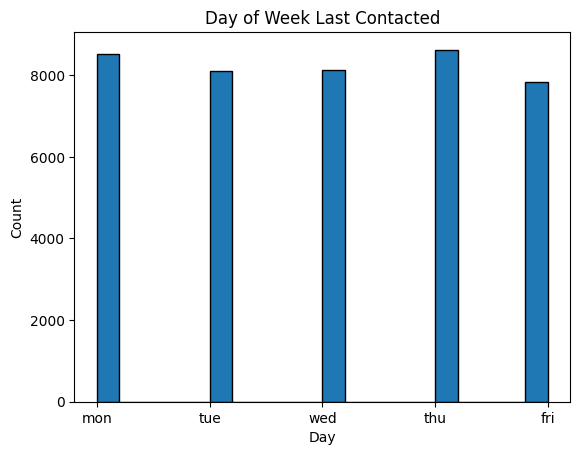

count     41188
unique        5
top         thu
freq       8623
Name: day_of_week, dtype: object

In [16]:
day_hist = plt.hist(df['day_of_week'], bins=20, edgecolor='black')

plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Day of Week Last Contacted')
plt.show()

df['day_of_week'].describe()

* The data shows that Thursday had the most calls performed, followed closely by Monday.
* Also, the data shows that although Thursday had the most calls, the number of calls amongst the days of the week were very similar

* From the data, Thursdays on the month of May have the most calls performed

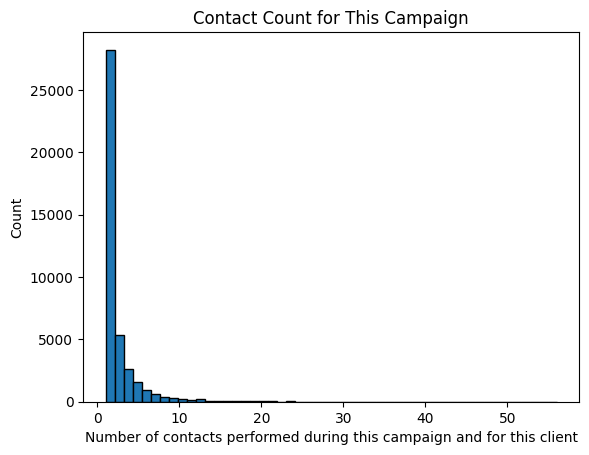

median:   2.0
mode:   1


count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [17]:
campaign_hist = plt.hist(df['campaign'], bins=50, edgecolor='black')

plt.xlabel('Number of contacts performed during this campaign and for this client')
plt.ylabel('Count')
plt.title('Contact Count for This Campaign')
plt.show()

print('median:  ',df['campaign'].median())
mode_duration = df['campaign'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['campaign'].describe()

* The mean and median average number of calls performed for this campaign on a client is 2 calls
* The most common number of calls on a client for this campaign was 1 call

* This would mean that those conducting the call have 1, and at most, 2 call opportunities to convince a potential client to subscribe.

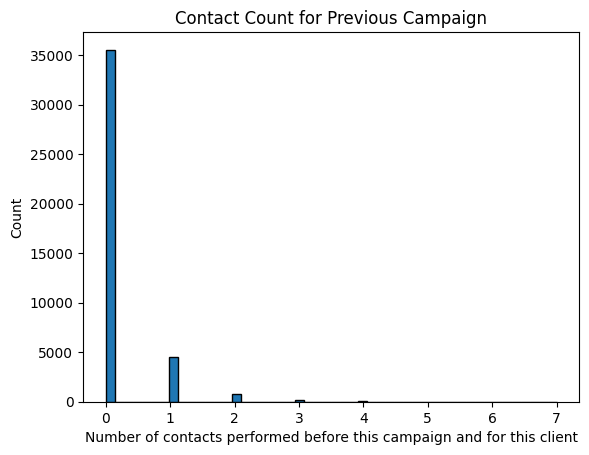

median:   0.0
mode:   0


count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [18]:
prev_campaign_hist = plt.hist(df['previous'], bins=50, edgecolor='black')

plt.xlabel('Number of contacts performed before this campaign and for this client')
plt.ylabel('Count')
plt.title('Contact Count for Previous Campaign')
plt.show()

print('median:  ',df['previous'].median())
mode_duration = df['previous'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['previous'].describe()

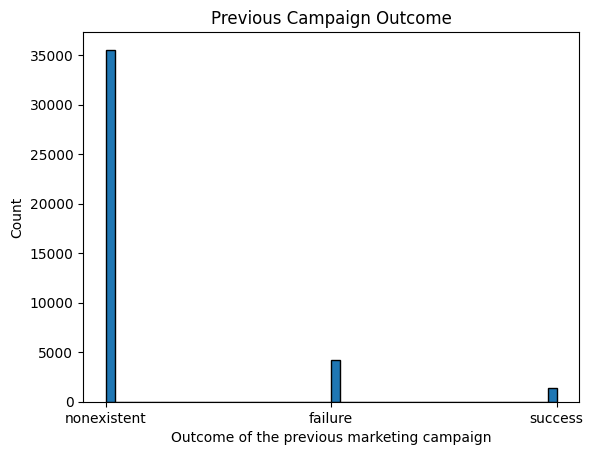

False    36936
True      4252
Name: poutcome, dtype: int64


count           41188
unique              3
top       nonexistent
freq            35563
Name: poutcome, dtype: object

In [19]:
prev_campaign_outcome_hist = plt.hist(df['poutcome'], bins=50, edgecolor='black')

plt.xlabel('Outcome of the previous marketing campaign')
plt.ylabel('Count')
plt.title('Previous Campaign Outcome')
plt.show()

print((df['poutcome'] == 'failure').value_counts())

df['poutcome'].describe()

* The data shows that almost all the customers were never contacted prior to the latest campaign
* Furthermore, of those with contacted in the previous campaign as well, only 10.32% _(4252 success / 41188 total)_ were successful marketing attempts

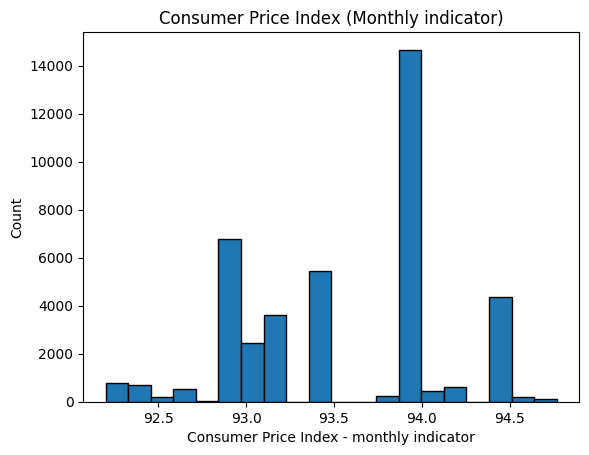

median:   93.749
mode:   93.994


count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

In [20]:
cpi_hist = plt.hist(df['cons.price.idx'], bins=20, edgecolor='black')

plt.xlabel('Consumer Price Index - monthly indicator')
plt.ylabel('Count')
plt.title('Consumer Price Index (Monthly indicator)')
plt.show()

print('median:  ',df['cons.price.idx'].median())
mode_duration = df['cons.price.idx'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['cons.price.idx'].describe()

* The CPI during most of the calls to the clients were at around 94 at the time the call was made.
* This would indicate that the calls were done during a time wherein price of goods and services were lower that base line for that year. This could possibly mean that the bank wants more term deposits to increase its funding source diversity, or increase liquidity due to people having more money due to lower cost of goods and services.

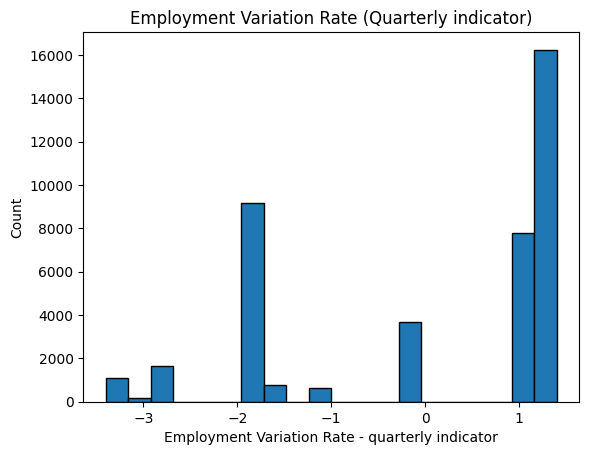

median:   1.1
mode:   1.4


count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [21]:
evr_hist = plt.hist(df['emp.var.rate'], bins=20, edgecolor='black')

plt.xlabel('Employment Variation Rate - quarterly indicator')
plt.ylabel('Count')
plt.title('Employment Variation Rate (Quarterly indicator)')
plt.show()

print('median:  ',df['emp.var.rate'].median())
mode_duration = df['emp.var.rate'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['emp.var.rate'].describe()

* An average EVR of 1.1 and 1.4 during the term deposit marketing campaign indicates that the bank tried to get more subscriptions due to increased consumer confidence that would be associated from increased financial stability of consumers due to better employment rates
* On the other hand, with -2 being the second highest EVR during the calls, banks tried to market their term deposit as a safe and conservative investment during lower employment numbers

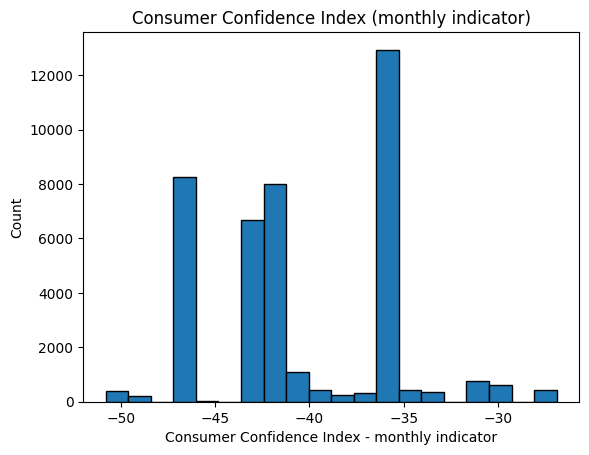

median:   -41.8
mode:   -36.4


count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [22]:
cci_hist = plt.hist(df['cons.conf.idx'], bins=20, edgecolor='black')

plt.xlabel('Consumer Confidence Index - monthly indicator')
plt.ylabel('Count')
plt.title('Consumer Confidence Index (monthly indicator)')
plt.show()

print('median:  ',df['cons.conf.idx'].median())
mode_duration = df['cons.conf.idx'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['cons.conf.idx'].describe()

* These negative CCI numbers indicate that the bank tried to market the term deposits during lower consumer confidence.
* This could mean that the term deposits were marketed as a safe and conservative investment for customers. In addition, this low CCI could be associated with slower economic growth, hence an opportunity for the bank to have increased deposit flows from the aforementioned reason.

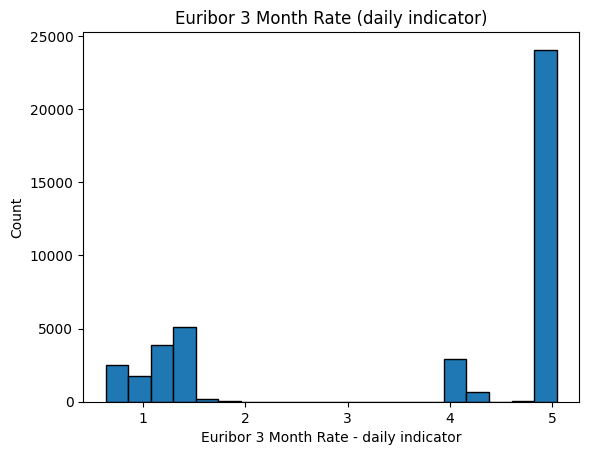

median:   4.857
mode:   4.857


count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

In [23]:
e3_hist = plt.hist(df['euribor3m'], bins=20, edgecolor='black')

plt.xlabel('Euribor 3 Month Rate - daily indicator')
plt.ylabel('Count')
plt.title('Euribor 3 Month Rate (daily indicator)')
plt.show()

print('median:  ',df['euribor3m'].median())
mode_duration = df['euribor3m'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')
df['euribor3m'].describe()

## ML

### Preparing data for ML

In [24]:
new_df = df.copy()
new_df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [25]:
# converting 'y' to int

new_df['y'] = (new_df['y'] == 'yes').astype(int)
new_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
new_df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [27]:
# in the information section, it said that 'duration' should not be included, hence we have to drop it

new_df = new_df.drop(['duration'], axis=1)


In [28]:
new_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

scale the some of the features data

In [29]:
new_df['emp.var.rate'] = StandardScaler().fit_transform(new_df['emp.var.rate'].to_numpy().reshape(-1, 1))
new_df['cons.price.idx'] = StandardScaler().fit_transform(new_df['cons.price.idx'].to_numpy().reshape(-1, 1))
new_df['cons.conf.idx'] = StandardScaler().fit_transform(new_df['cons.conf.idx'].to_numpy().reshape(-1, 1))
new_df['nr.employed'] = StandardScaler().fit_transform(new_df['nr.employed'].to_numpy().reshape(-1, 1))
new_df['euribor3m'] = StandardScaler().fit_transform(new_df['euribor3m'].to_numpy().reshape(-1, 1))

In [30]:
print(new_df['y'].value_counts())
new_df.head()


0    36548
1     4640
Name: y, dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,0


encoding the categorical values

In [31]:
new_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [32]:
# Using one hot encoding on features
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

new_df_encoded = pd.get_dummies(new_df, columns= categorical_columns)

new_df_encoded.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,0.648092,0.722722,0.886447,0.71246,0.33168,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
new_df_encoded.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'mo

sample and split dataset into training, validation, and test datasets

In [34]:
train, valid, test = np.split(new_df_encoded.sample(frac=1, random_state=42), [int(0.6*len(new_df_encoded)), int(0.8*len(new_df_encoded))])
train['y'].value_counts(), test['y'].value_counts(), valid['y'].value_counts()

(0    21898
 1     2814
 Name: y, dtype: int64,
 0    7290
 1     948
 Name: y, dtype: int64,
 0    7360
 1     878
 Name: y, dtype: int64)

In [35]:
x_train, y_train = train.drop(columns=['y']), train['y']
x_test, y_test = test.drop(columns=['y']), test['y']
x_valid, y_valid = valid.drop(columns=['y']), valid['y']
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_valid.shape, y_valid.shape


((24712, 62), (24712,), (8238, 62), (8238,), (8238, 62), (8238,))

In [36]:
y_train.value_counts()

0    21898
1     2814
Name: y, dtype: int64

In [37]:
#convert to numpy
x_train_np, y_train_np = x_train.to_numpy(), y_train.to_numpy()
x_test_np, y_test_np = x_test.to_numpy(), y_test.to_numpy()
x_valid_np, y_valid_np = x_valid.to_numpy(), y_valid.to_numpy()

x_train_np.shape, y_train_np.shape, x_test_np.shape, y_test_np.shape, x_valid_np.shape, y_valid_np.shape

((24712, 62), (24712,), (8238, 62), (8238,), (8238, 62), (8238,))

Import Models

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [39]:
# import metrics

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error 

### Logistic Regression

In [40]:
LR_model = LogisticRegression()
LR_model = LR_model.fit(x_train_np, y_train_np)

c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print(classification_report(y_valid_np, LR_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.92      0.99      0.95      7360
       Subscribed       0.66      0.24      0.35       878

         accuracy                           0.91      8238
        macro avg       0.79      0.61      0.65      8238
     weighted avg       0.89      0.91      0.89      8238



### Random Forest

In [42]:
RF_model = RandomForestClassifier()
RF_model = RF_model.fit(x_train_np, y_train_np)

In [43]:
print(classification_report(y_valid_np, RF_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.92      0.97      0.95      7360
       Subscribed       0.55      0.28      0.38       878

         accuracy                           0.90      8238
        macro avg       0.74      0.63      0.66      8238
     weighted avg       0.88      0.90      0.88      8238



### Gradient Boost

In [44]:
GB_model = GradientBoostingClassifier(n_estimators=100, learning_rate= 0.01)
GB_model = GB_model.fit(x_train_np, y_train_np)

In [45]:
print(classification_report(y_valid_np, GB_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.90      1.00      0.95      7360
       Subscribed       0.80      0.12      0.20       878

         accuracy                           0.90      8238
        macro avg       0.85      0.56      0.57      8238
     weighted avg       0.89      0.90      0.87      8238



### SVM

In [46]:
SVM_model = SVC(class_weight='balanced')
SVM_model = SVM_model.fit(x_train_np, y_train_np)

In [47]:
print(classification_report(y_valid_np, SVM_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.91      0.99      0.95      7360
       Subscribed       0.64      0.20      0.30       878

         accuracy                           0.90      8238
        macro avg       0.78      0.59      0.63      8238
     weighted avg       0.88      0.90      0.88      8238



### XGBoost

In [48]:
XGB_model = XGBClassifier()
XGB_model = XGB_model.fit(x_train_np, y_train_np)

In [49]:
print(classification_report(y_valid_np, XGB_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.92      0.98      0.95      7360
       Subscribed       0.61      0.29      0.39       878

         accuracy                           0.90      8238
        macro avg       0.77      0.63      0.67      8238
     weighted avg       0.89      0.90      0.89      8238



### K Nearest Neighbor

In [50]:
KNN_model = KNeighborsClassifier()
KNN_model = KNN_model.fit(x_train_np, y_train_np)

In [51]:
print(classification_report(y_valid_np, KNN_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.92      0.97      0.94      7360
       Subscribed       0.51      0.28      0.36       878

         accuracy                           0.89      8238
        macro avg       0.72      0.62      0.65      8238
     weighted avg       0.88      0.89      0.88      8238



### Naive Bayes

In [52]:
NB_model = GaussianNB()
NB_model = NB_model.fit(x_train_np, y_train_np)

In [53]:
print(classification_report(y_valid_np, NB_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.93      0.91      0.92      7360
       Subscribed       0.38      0.46      0.42       878

         accuracy                           0.86      8238
        macro avg       0.66      0.69      0.67      8238
     weighted avg       0.88      0.86      0.87      8238



### Neural Network

In [54]:
NN_model = MLPClassifier()
NN_model = NN_model.fit(x_train_np, y_train_np)

In [55]:
print(classification_report(y_valid_np, NN_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.91      0.99      0.95      7360
       Subscribed       0.66      0.23      0.34       878

         accuracy                           0.91      8238
        macro avg       0.79      0.61      0.64      8238
     weighted avg       0.89      0.91      0.88      8238



### Lets try tensorflow's Neural Network

In [63]:
import tensorflow as tf

In [100]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.legend()
  plt.show()

In [122]:
# Define the neural network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=x_train_np.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
checkpoint = tf.keras.callbacks.ModelCheckpoint('model', save_best_only=True)

In [123]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [124]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 32)                2016      
                                                                 
 dense_37 (Dense)            (None, 32)                1056      
                                                                 
 dropout_12 (Dropout)        (None, 32)                0         
                                                                 
 batch_normalization_12 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_38 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3233 (12.63 KB)
Trainable params: 3169 (12.38 KB)
Non-trainable params: 64 (256.00 Byte)
________________

In [125]:
# Train the model
epochs = 50  
history = model.fit(x_train_np, y_train_np, epochs=epochs, batch_size=32, validation_data=(x_valid_np, y_valid_np), verbose=0, callbacks=checkpoint)


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [126]:
# evaluate model
model.evaluate(x_valid_np, y_valid_np)

258/258 [==============================] - 0s 707us/step - loss: 0.3122 - accuracy: 0.9042


[0.3122199773788452, 0.9042243361473083]

In [127]:
y_pred = model.predict(x_valid_np)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

258/258 [==============================] - 0s 581us/step


In [128]:
print(classification_report(y_valid_np, y_pred, target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.91      0.99      0.95      7360
       Subscribed       0.71      0.17      0.27       878

         accuracy                           0.90      8238
        macro avg       0.81      0.58      0.61      8238
     weighted avg       0.89      0.90      0.88      8238



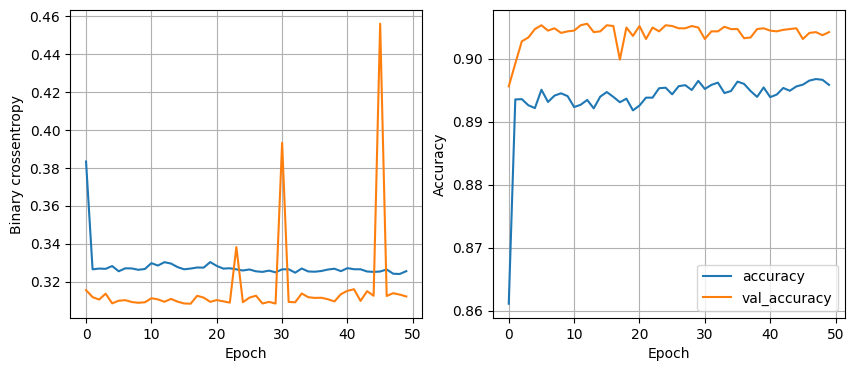

In [129]:
plot_history(history)

In [130]:
# Train the model @ 100 epochs
epochs = 100  
history = model.fit(x_train_np, y_train_np, epochs=epochs, batch_size=32, validation_data=(x_valid_np, y_valid_np), verbose=0, callbacks=checkpoint)

In [131]:
# evaluate model
model.evaluate(x_valid_np, y_valid_np)

258/258 [==============================] - 0s 759us/step - loss: 0.3241 - accuracy: 0.9034


[0.32407477498054504, 0.9033746123313904]

In [132]:
y_pred = model.predict(x_valid_np)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

258/258 [==============================] - 0s 623us/step


In [133]:
print(classification_report(y_valid_np, y_pred, target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.91      0.99      0.95      7360
       Subscribed       0.69      0.17      0.27       878

         accuracy                           0.90      8238
        macro avg       0.80      0.58      0.61      8238
     weighted avg       0.89      0.90      0.88      8238



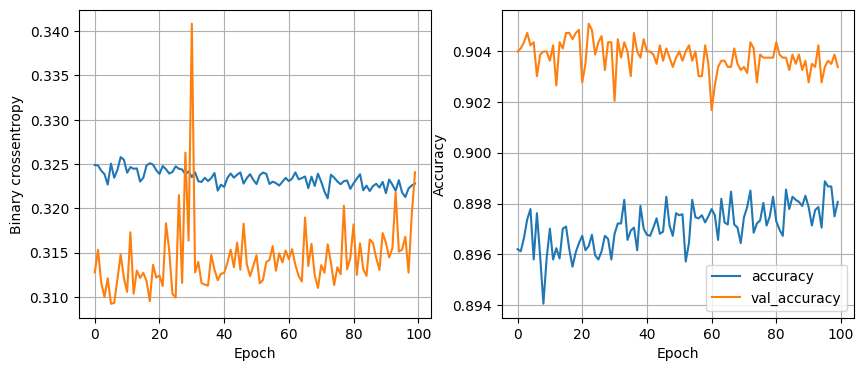

In [134]:
plot_history(history)

In [135]:
# Train the model @ 60 epochs
epochs = 60 
history = model.fit(x_train_np, y_train_np, epochs=epochs, batch_size=32, validation_data=(x_valid_np, y_valid_np), verbose=0, callbacks=checkpoint)

In [136]:
# evaluate model
model.evaluate(x_valid_np, y_valid_np)

y_pred = model.predict(x_valid_np)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

258/258 [==============================] - 0s 644us/step


In [137]:
print(classification_report(y_valid_np, y_pred, target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.91      0.99      0.95      7360
       Subscribed       0.68      0.15      0.24       878

         accuracy                           0.90      8238
        macro avg       0.79      0.57      0.59      8238
     weighted avg       0.88      0.90      0.87      8238



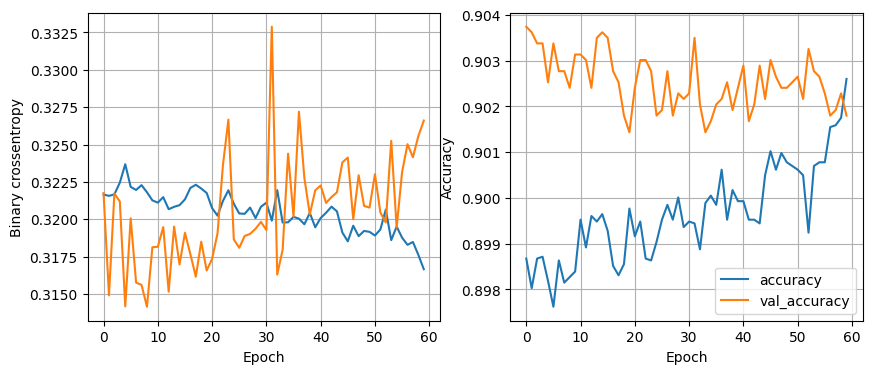

In [138]:
plot_history(history)

In [139]:
# Train the model @ 150 epochs
epochs = 150 
history = model.fit(x_train_np, y_train_np, epochs=epochs, batch_size=32, validation_data=(x_valid_np, y_valid_np), verbose=0, callbacks=checkpoint)

In [140]:
# evaluate model
model.evaluate(x_valid_np, y_valid_np)

y_pred = model.predict(x_valid_np)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

258/258 [==============================] - 0s 545us/step


In [141]:
print(classification_report(y_valid_np, y_pred, target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.91      0.99      0.95      7360
       Subscribed       0.72      0.14      0.23       878

         accuracy                           0.90      8238
        macro avg       0.81      0.57      0.59      8238
     weighted avg       0.89      0.90      0.87      8238



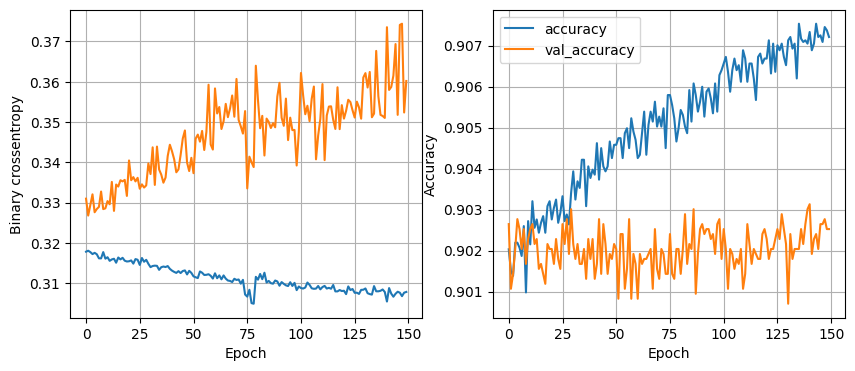

In [142]:
plot_history(history)

lets try using oversampling to see if it improves the Subscription Prediction precision rate

In [143]:
from imblearn.over_sampling import RandomOverSampler

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to your training data
X_train_resampled, y_train_resampled = ros.fit_resample(x_train_np, y_train_np)

In [144]:
# Train the model with resampled training data
epochs = 50  
history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=32, validation_data=(x_valid_np, y_valid_np), verbose=0, callbacks=checkpoint)


In [145]:
# evaluate model
model.evaluate(x_valid_np, y_valid_np)

y_pred = model.predict(x_valid_np)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

258/258 [==============================] - 0s 615us/step


                   precision    recall  f1-score   support

Did Not Subscribe       0.91      0.99      0.95      7360
       Subscribed       0.71      0.15      0.25       878

         accuracy                           0.90      8238
        macro avg       0.81      0.57      0.60      8238
     weighted avg       0.89      0.90      0.87      8238



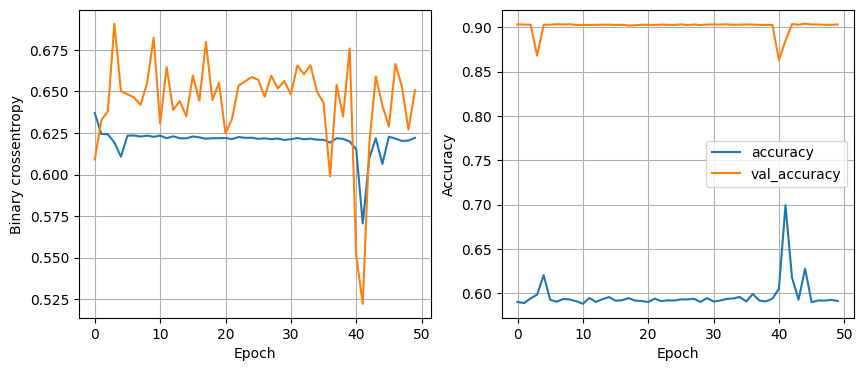

In [146]:
print(classification_report(y_valid_np, y_pred, target_names=['Did Not Subscribe', 'Subscribed']))

plot_history(history)

In [147]:
# Train the model with resampled training data
epochs = 100  
history = model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=32, validation_data=(x_valid_np, y_valid_np), verbose=0, callbacks=checkpoint)


258/258 [==============================] - 0s 561us/step
                   precision    recall  f1-score   support

Did Not Subscribe       0.94      0.90      0.92      7360
       Subscribed       0.40      0.54      0.46       878

         accuracy                           0.86      8238
        macro avg       0.67      0.72      0.69      8238
     weighted avg       0.88      0.86      0.87      8238



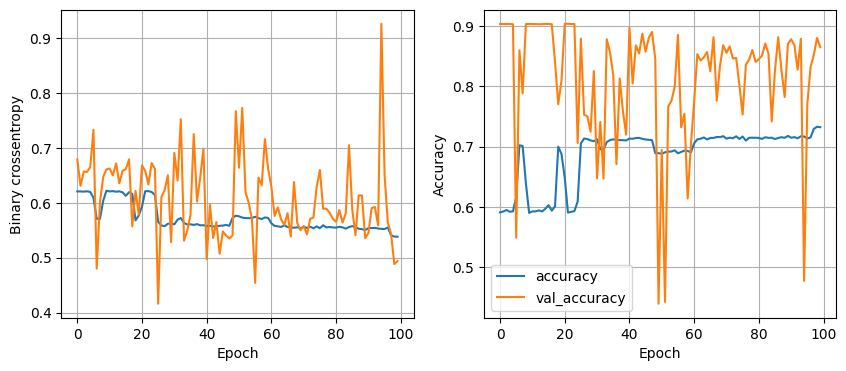

In [148]:
# evaluate model
model.evaluate(x_valid_np, y_valid_np)

y_pred = model.predict(x_valid_np)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_valid_np, y_pred, target_names=['Did Not Subscribe', 'Subscribed']))

plot_history(history)

* using oversampling to balance the data did not help improve the Subscription precision of the TF Neural Net

Lets try with the other algorithms, but this time with the oversampled data

In [172]:
#Logistic Regression

LR_model_resampled = LogisticRegression(max_iter=800)
LR_model_resampled = LR_model_resampled.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_valid_np, LR_model_resampled.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.95      0.85      0.90      7360
       Subscribed       0.34      0.64      0.45       878

         accuracy                           0.83      8238
        macro avg       0.65      0.75      0.67      8238
     weighted avg       0.89      0.83      0.85      8238



In [173]:
#Random Forest

RF_model_resampled = RandomForestClassifier()
RF_model_resampled = RF_model_resampled.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_valid_np, RF_model_resampled.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.93      0.95      0.94      7360
       Subscribed       0.50      0.40      0.44       878

         accuracy                           0.89      8238
        macro avg       0.71      0.68      0.69      8238
     weighted avg       0.88      0.89      0.89      8238



In [174]:
#Gradient Boost

GB_model_resampled = GradientBoostingClassifier()
GB_model_resampled = GB_model_resampled.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_valid_np, GB_model_resampled.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.95      0.86      0.90      7360
       Subscribed       0.35      0.65      0.45       878

         accuracy                           0.83      8238
        macro avg       0.65      0.75      0.68      8238
     weighted avg       0.89      0.83      0.85      8238



In [175]:
#SVM

SVM_model_resampled = SVC()
SVM_model_resampled = SVM_model.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_valid_np, SVM_model_resampled.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.91      0.99      0.95      7360
       Subscribed       0.64      0.20      0.30       878

         accuracy                           0.90      8238
        macro avg       0.78      0.59      0.63      8238
     weighted avg       0.88      0.90      0.88      8238



In [176]:
#XGBoost

XGB_model_resampled = XGBClassifier()
XGB_model_resampled = XGB_model_resampled.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_valid_np, XGB_model_resampled.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.95      0.88      0.91      7360
       Subscribed       0.36      0.58      0.44       878

         accuracy                           0.84      8238
        macro avg       0.65      0.73      0.67      8238
     weighted avg       0.88      0.84      0.86      8238



In [177]:
#KNN

KNN_model_resampled = KNeighborsClassifier()
KNN_model_resampled = KNN_model_resampled.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_valid_np, KNN_model_resampled.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.94      0.81      0.87      7360
       Subscribed       0.25      0.55      0.34       878

         accuracy                           0.78      8238
        macro avg       0.59      0.68      0.61      8238
     weighted avg       0.86      0.78      0.81      8238



In [178]:
#NB

NB_model_resampled = GaussianNB()
NB_model_resampled = NB_model_resampled.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_valid_np, NB_model_resampled.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.94      0.88      0.91      7360
       Subscribed       0.35      0.52      0.42       878

         accuracy                           0.84      8238
        macro avg       0.64      0.70      0.66      8238
     weighted avg       0.88      0.84      0.86      8238



In [179]:
#MLP NN

NN_model_resampled = MLPClassifier()
NN_model_resampled = NN_model_resampled.fit(X_train_resampled, y_train_resampled)

print(classification_report(y_valid_np, NN_model_resampled.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.95      0.88      0.91      7360
       Subscribed       0.37      0.61      0.46       878

         accuracy                           0.85      8238
        macro avg       0.66      0.74      0.69      8238
     weighted avg       0.89      0.85      0.86      8238



* redoing the models with resampled data made the results worse. Hence, we will now choose from the models used earlier prior to using the oversampler 

In [181]:
print(classification_report(y_valid_np, LR_model.predict(x_valid_np), target_names=['Did Not Subscribe', 'Subscribed']))

                   precision    recall  f1-score   support

Did Not Subscribe       0.92      0.99      0.95      7360
       Subscribed       0.68      0.24      0.36       878

         accuracy                           0.91      8238
        macro avg       0.80      0.62      0.65      8238
     weighted avg       0.89      0.91      0.89      8238



Among the models, the Logistic Regression model appears to have achieved a relatively good balance between precision and recall for the "Subscribed" class, as well as a high overall accuracy:

- Precision (Subscribed): 0.68
- Recall (Subscribed): 0.24
- F1-Score (Subscribed): 0.36
- Accuracy: 0.91

While the precision for the "Subscribed" class is not the highest, it is still relatively good compared to some other models, and the recall is also better than some other models. The F1-score of 0.35 suggests a reasonable balance between precision and recall for the "Subscribed" class.